In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model

from sklearn.preprocessing import StandardScaler

from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier

import plotly.graph_objects as go

import plotly as py

import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)


# Tomamos los distintos csv importantes

In [147]:
enron = pd.read_csv("./data/features-enron.csv")
phi = pd.read_csv("./data/features-phishing.csv")

In [148]:
phi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256 entries, 0 to 2255
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          2256 non-null   int64 
 1   @ in URLs           2256 non-null   bool  
 2   Attachments         2256 non-null   int64 
 3   Css                 2256 non-null   int64 
 4   Encoding            2256 non-null   object
 5   External Resources  2256 non-null   int64 
 6   Flash content       2256 non-null   bool  
 7   HTML content        2256 non-null   bool  
 8   Html Form           2256 non-null   bool  
 9   Html iFrame         2256 non-null   bool  
 10  IPs in URLs         2256 non-null   bool  
 11  Javascript          2256 non-null   int64 
 12  Phishy              2256 non-null   bool  
 13  URLs                2256 non-null   int64 
dtypes: bool(7), int64(6), object(1)
memory usage: 138.9+ KB


In [149]:
enron.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256 entries, 0 to 2255
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          2256 non-null   int64 
 1   @ in URLs           2256 non-null   bool  
 2   Attachments         2256 non-null   int64 
 3   Css                 2256 non-null   int64 
 4   Encoding            2256 non-null   object
 5   External Resources  2256 non-null   int64 
 6   Flash content       2256 non-null   bool  
 7   HTML content        2256 non-null   bool  
 8   Html Form           2256 non-null   bool  
 9   Html iFrame         2256 non-null   bool  
 10  IPs in URLs         2256 non-null   bool  
 11  Javascript          2256 non-null   int64 
 12  Phishy              2256 non-null   bool  
 13  URLs                2256 non-null   int64 
dtypes: bool(7), int64(6), object(1)
memory usage: 138.9+ KB


In [150]:
phi.Phishy.value_counts()

True    2256
Name: Phishy, dtype: int64

In [151]:
enron.Phishy.value_counts()

False    2256
Name: Phishy, dtype: int64

In [152]:
phi.sample(10)


,Unnamed: 0,@ in URLs,Attachments,Css,Encoding,External Resources,Flash content,HTML content,Html Form,Html iFrame,IPs in URLs,Javascript,Phishy,URLs
156,156,False,2,0,none,0,False,True,False,False,False,0,True,5
877,877,False,0,0,none,0,False,True,False,False,True,0,True,48
551,551,False,0,0,none,0,False,True,False,False,False,0,True,2
1933,1933,False,0,0,none,0,False,True,False,False,False,0,True,2
51,51,False,0,0,7bit,0,False,True,False,False,True,0,True,22
2008,2008,False,0,0,7bit,0,False,True,False,False,False,0,True,18
2126,2126,False,0,0,none,0,False,True,False,False,False,0,True,29
1398,1398,False,0,0,none,0,False,True,False,False,False,0,True,1
929,929,False,0,0,none,0,False,True,False,False,True,0,True,9
395,395,False,0,0,none,0,False,True,False,False,False,0,True,1


In [153]:
phi.value_counts()


Unnamed: 0  @ in URLs  Attachments  Css  Encoding  External Resources  Flash content  HTML content  Html Form  Html iFrame  IPs in URLs  Javascript  Phishy  URLs
0           False      0            0    none      0                   False          True          False      False        True         0           True    2       1
1507        False      0            0    7bit      0                   False          True          False      False        True         0           True    1       1
1501        False      0            0    none      0                   False          True          False      False        False        0           True    3       1
1502        False      0            0    7bit      0                   False          True          False      False        False        0           True    6       1
1503        False      0            0    8bit      0                   False          True          False      False        False        0           True    13      1
   

In [154]:
phi["External Resources"].value_counts()

0     2218
1       18
2       11
4        4
11       2
3        1
5        1
7        1
Name: External Resources, dtype: int64

<AxesSubplot:>

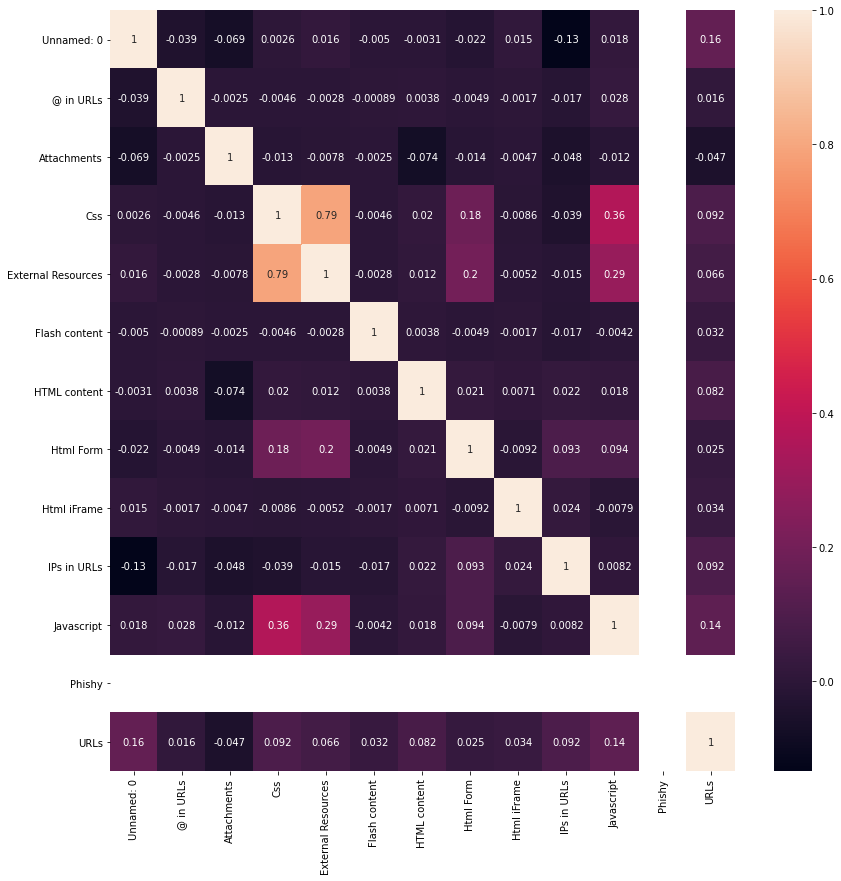

In [155]:
#phi = phi.drop(columns=["Phishy"])
from matplotlib.colors import ListedColormap
fix, ax = plt.subplots(figsize=(14,14))
sns.heatmap(phi.corr(),annot = True, ax= ax )

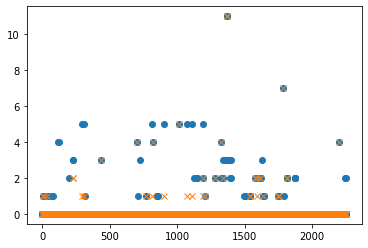

In [156]:
plt.plot(phi.Css ,"o")
plt.plot(phi["External Resources"], "x")

In [157]:
enron.sample(10)

,Unnamed: 0,@ in URLs,Attachments,Css,Encoding,External Resources,Flash content,HTML content,Html Form,Html iFrame,IPs in URLs,Javascript,Phishy,URLs
2054,2054,False,0,0,7bit,0,False,False,False,False,False,0,False,0
1829,1829,False,0,0,7bit,0,False,False,False,False,False,0,False,0
1693,1693,False,0,0,7bit,0,False,False,False,False,False,0,False,0
76,76,False,0,0,7bit,0,False,False,False,False,False,0,False,0
214,214,False,0,0,7bit,0,False,False,False,False,False,0,False,0
2142,2142,False,0,0,7bit,0,False,False,False,False,False,0,False,0
1659,1659,False,0,0,7bit,0,False,False,False,False,False,0,False,0
1272,1272,False,0,0,7bit,0,False,True,False,False,False,0,False,2
942,942,False,0,0,7bit,0,False,False,False,False,False,0,False,1
662,662,False,0,0,7bit,0,False,False,False,False,False,0,False,0


In [158]:
phi.sample(10)

,Unnamed: 0,@ in URLs,Attachments,Css,Encoding,External Resources,Flash content,HTML content,Html Form,Html iFrame,IPs in URLs,Javascript,Phishy,URLs
543,543,False,0,0,none,0,False,True,False,False,False,0,True,2
352,352,False,0,0,none,0,False,True,False,False,False,0,True,1
1814,1814,False,0,2,7bit,2,False,True,False,False,False,0,True,11
865,865,False,0,0,none,0,False,True,False,False,False,0,True,1
1090,1090,False,0,0,none,0,False,True,False,False,False,0,True,5
419,419,False,0,0,none,0,False,True,False,False,False,0,True,1
1748,1748,False,0,0,none,0,False,True,False,False,False,0,True,1
1006,1006,False,0,0,7bit,0,False,True,False,False,True,0,True,36
153,153,False,0,0,none,0,False,True,False,False,False,0,True,34
1793,1793,False,0,0,none,0,False,True,False,False,False,0,True,0


In [159]:
#define fullReplaced

frames = [enron, phi]
full = pd.concat(frames)
full = full.drop(columns=("Unnamed: 0"))

fullReplaced = full

In [160]:
#shuffle fullReplaced
fullReplaced = fullReplaced.sample(frac=1)
fullReplaced

,@ in URLs,Attachments,Css,Encoding,External Resources,Flash content,HTML content,Html Form,Html iFrame,IPs in URLs,Javascript,Phishy,URLs
450,False,0,0,none,0,False,True,False,False,False,0,True,1
1147,False,0,0,7bit,0,False,False,False,False,False,0,False,0
562,False,0,0,7bit,0,False,False,False,False,False,0,False,0
507,False,0,0,7bit,0,False,False,False,False,False,0,False,0
741,False,0,0,none,0,False,True,False,False,True,0,True,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1511,False,0,0,7bit,0,False,False,False,False,False,0,False,0
400,False,0,0,none,0,False,True,False,False,False,0,True,1
1823,False,0,0,none,0,False,True,False,False,False,0,True,11
1472,False,0,0,none,0,False,True,False,False,False,0,True,4


In [161]:
# reemplazar valores en Encoding a valores categoricos

def replace(column, find, value):
    fullReplaced[column] = fullReplaced[column].replace(find, value)
    
replace("Encoding", ["7bit", "7bit "], 1)
replace("Encoding", "none", 2)
replace("Encoding", "quoted-printable", 3)
replace("Encoding", "8bit", 4)
replace("Encoding", "8bit\\r\\n", 5)
replace("Encoding", "base64", 6)
replace("Encoding", "7bit\n\tboundary=\"--vhoabg67774\"", 7)

# reemplazar valores True/False a 1 y 0 en 
# @ in URLs Flash content	HTML content	Html Form	Html iFrame	IPs in URLs

def replaceBool(columnList):
    for i in columnList:
        fullReplaced[i] = fullReplaced[i].astype(int)

replaceBool(["@ in URLs", "Flash content", "HTML content","Html Form", "Html iFrame", "IPs in URLs", "Phishy"])

<AxesSubplot:>

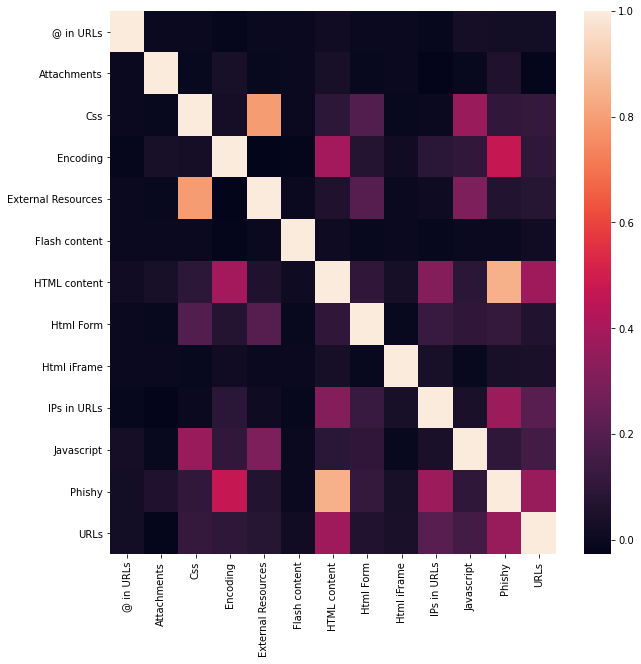

In [162]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(fullReplaced.corr(), annot=False, ax=ax)

# We now have a clean dataset to with with: fullReplaced

In [163]:
#def createDummies(column, prefix):
#    global fullReplaced
#    for i, j in zip(column,prefix):
#        fullReplaced = pd.concat([fullReplaced, pd.get_dummies(data = fullReplaced[i], prefix = j, drop_first=True)], axis= 1)

In [164]:
#columnsForDummies = ['@ in URLs', 'Attachments', 'Css', 'Encoding', 'External Resources',
#       'Flash content', 'HTML content', 'Html Form', 'Html iFrame',
#       'IPs in URLs', 'Javascript', 'URLs']
#
#prefixForDummies = ["@url", "att", "css", "enco", "externalRe", "flashCon", "htmlCon", "htmlForm", "htmlIfram", "ips", "js", "urls"]

In [165]:
#createDummies(columnsForDummies, prefixForDummies)

In [166]:
#fullReplaced.shape

In [167]:
#fullReplaced = fullReplaced.drop(columns=['@ in URLs', 'Attachments', 'Css', 'Encoding', 'External Resources',
#       'Flash content', 'HTML content', 'Html Form', 'Html iFrame',
#       'IPs in URLs', 'Javascript', 'URLs'])

# Naive Bayes

In [168]:

X = fullReplaced.drop(["Phishy"], axis = 1)
y = fullReplaced["Phishy"]
print("Shape of X: ", X.shape)
print("Shape of y: ", y.shape)

Shape of X:  (4512, 12)
Shape of y:  (4512,)


In [169]:
# Separamos nuestro dataset en Train y Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) #escalamos x_train
print("Mean of X_train: ", np.mean(X_train))
print("Std of X_train: ", np.std(X_train))

Mean of X_train:  1.2773251504749634e-17
Std of X_train:  1.0


In [170]:
modelNB = GaussianNB()
modelNB.fit(X_train, y_train)

X_test = scaler.transform(X_test)
labelPred = modelNB.predict(X_test)

accuaracy = accuracy_score(y_test, labelPred)
print("Accuaracy: ", accuaracy)

Accuaracy:  0.6524822695035462


Text(47.040000000000006, 0.5, 'Etiquetas Predichas')

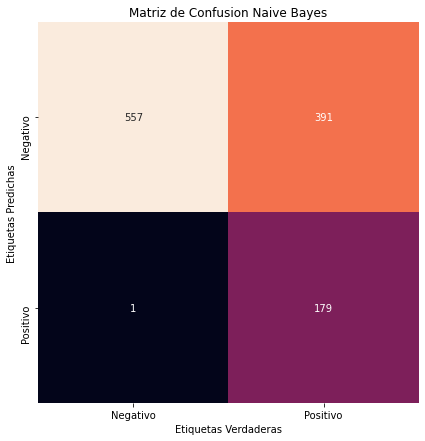

In [171]:
mat = confusion_matrix(y_test, labelPred)
plt.subplots(figsize=(7,7))

ax = plt.axes()

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['Negativo','Positivo'], yticklabels=['Negativo','Positivo'], ax=ax)

ax.set_title('Matriz de Confusion Naive Bayes')

plt.xlabel('Etiquetas Verdaderas')
plt.ylabel('Etiquetas Predichas')

In [172]:
TP = mat[1, 1]
TN = mat[0, 0]
FP = mat[0, 1]
FN = mat[1, 0]

classErrorNB = (1 - accuaracy)
classErrorNB

0.34751773049645385

In [173]:
recallNB = recall_score(y_test, labelPred)

In [174]:
specificityNB = TN / (TN + FP)

In [175]:
specificityNB

0.9982078853046595

In [176]:
precisionNB = precision_score(y_test, labelPred)

In [177]:
f1NB = f1_score(y_test, labelPred)

In [178]:
f1NB

0.47733333333333333

In [179]:
dictNB = {
    'Modelo': 'Naive Bayes',
    'Accuracy': accuaracy,
    'Classification Error': classErrorNB,
    'Recall': recallNB,
    'Specificity': specificityNB,
    'Precision': precisionNB,
    'F1 Score': f1NB,
}


In [180]:
dictNB

{'Modelo': 'Naive Bayes',
 'Accuracy': 0.6524822695035462,
 'Classification Error': 0.34751773049645385,
 'Recall': 0.3140350877192982,
 'Specificity': 0.9982078853046595,
 'Precision': 0.9944444444444445,
 'F1 Score': 0.47733333333333333}

In [181]:
scores_para_df = []
C_tunning = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
for i in C_tunning:
    lg = linear_model.LogisticRegression(C=i, max_iter=500)
    cv_scores = cross_val_score(lg, X_train, y_train, cv=5)
    dict_row_score = {'score_medio':np.mean(cv_scores),'score_std':np.std(cv_scores),'C':i}
    scores_para_df.append(dict_row_score)

In [182]:
scores = pd.DataFrame(scores_para_df)
scores[scores["score_medio"] == scores["score_medio"].max()]

,score_medio,score_std,C
5,0.917262,0.014987,100.0
6,0.917262,0.014987,1000.0


In [183]:
lgFinal = linear_model.LogisticRegression(C = 1000)
lgFinal.fit(X_train, y_train)
yPredLgFinalTest = lgFinal.predict(X_test)

In [184]:
accLG = accuracy_score(y_test, yPredLgFinalTest)
print("Accuracy: ", accLG)

Accuracy:  0.9326241134751773


Text(47.040000000000006, 0.5, 'Etiquetas Predichas')

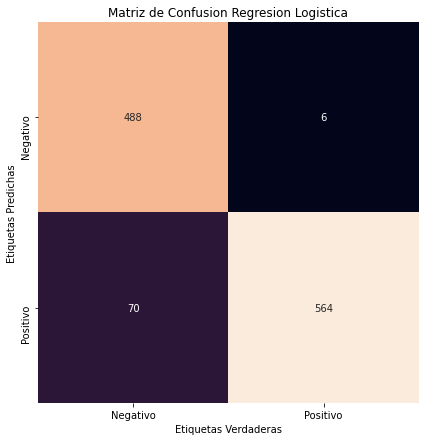

In [185]:
matLG = confusion_matrix(y_test, yPredLgFinalTest)
plt.subplots(figsize=(7,7))

ax = plt.axes()

sns.heatmap(matLG.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['Negativo','Positivo'], yticklabels=['Negativo','Positivo'], ax=ax)

ax.set_title('Matriz de Confusion Regresion Logistica')

plt.xlabel('Etiquetas Verdaderas')
plt.ylabel('Etiquetas Predichas')

In [186]:
TP = matLG[1, 1]
TN = matLG[0, 0]
FP = matLG[0, 1]
FN = matLG[1, 0]

classErrorLG = (1 - accLG)

recallLG = recall_score (y_test, yPredLgFinalTest)

specificityLG = TN / (TN + FP)

precisionLG = precision_score(y_test, yPredLgFinalTest)

f1LG = f1_score(y_test, yPredLgFinalTest)

In [187]:
dictLG = {
    'Modelo': 'Regresion Logistica',
    'Accuracy': accLG,
    'Classification Error': classErrorLG,
    'Recall': recallLG,
    'Specificity': specificityLG,
    'Precision': precisionLG,
    'F1 Score': f1LG,
}


In [188]:
dictLG

{'Modelo': 'Regresion Logistica',
 'Accuracy': 0.9326241134751773,
 'Classification Error': 0.06737588652482274,
 'Recall': 0.9894736842105263,
 'Specificity': 0.8745519713261649,
 'Precision': 0.889589905362776,
 'F1 Score': 0.93687707641196}

In [189]:
KNN_scores_para_df = []

# range(1,100,10) son los posibles valores de n_neighbors que quiero explorar. Son todos los enteros desde el 1
# hasta el 100 en saltos de a 10. (Start,Stop,Step)
for i in range(1,100,10):
    # En cada iteración instanciamos el modelo con un hiperparámetro distinto
    KNN_model = KNeighborsClassifier(n_neighbors=i)
    
    # cross_val_scores nos devuelve un array de 5 resultados, uno por cada partición que hizo automáticamente CV  
    KNN_cv_scores = cross_val_score(KNN_model, X_train, y_train, cv=5)
    
    # Para cada valor de n_neighbours, creo un diccionario con el valor de n_neighbours y la media y el desvío de los scores.
    KNN_dict_row_score = {'score_medio':np.mean(KNN_cv_scores),'score_std':np.std(KNN_cv_scores),'n_neighbours':i}
    
    # Guardo cada uno en la lista de diccionarios
    KNN_scores_para_df.append(KNN_dict_row_score)

In [190]:
scoresKNN = pd.DataFrame(KNN_scores_para_df)
scoresKNN[scoresKNN["score_medio"] == scoresKNN["score_medio"].max()]


,score_medio,score_std,n_neighbours
1,0.963952,0.009545,11


In [191]:
KNNFinal = KNeighborsClassifier(n_neighbors=1)
KNNFinal.fit(X_train, y_train)
ypredKNNtest = KNNFinal.predict(X_test)
accKNN = accuracy_score(y_test, ypredKNNtest)

print("Accuracy: ", accKNN)

Accuracy:  0.949468085106383


Text(91.68, 0.5, 'Etiquetas Predichas')

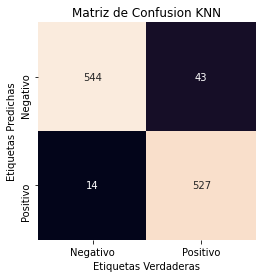

In [192]:
# Matriz de confusión:
matKNN = confusion_matrix(y_test, ypredKNNtest)

ax = plt.axes()

sns.heatmap(matKNN.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['Negativo','Positivo'], yticklabels=['Negativo','Positivo'], ax=ax)

ax.set_title('Matriz de Confusion KNN')
plt.xlabel('Etiquetas Verdaderas')
plt.ylabel('Etiquetas Predichas')

In [193]:
TP = matKNN[1, 1]
TN = matKNN[0, 0]
FP = matKNN[0, 1]
FN = matKNN[1, 0]

class_error_KNN = (1 - accKNN)
recall_KNN = recall_score(y_test, ypredKNNtest)
specificity_KNN = TN / (TN + FP)
precision_KNN = precision_score(y_test, ypredKNNtest)
f1_KNN = f1_score(y_test, ypredKNNtest)

In [194]:
dictKNN = {
    'Modelo': 'KNN',
    'Accuracy': accKNN,
    'Classification Error': class_error_KNN,
    'Recall': recall_KNN,
    'Specificity': specificity_KNN,
    'Precision': precision_KNN,
    'F1 Score': f1_KNN,
}

In [195]:
dictKNN

{'Modelo': 'KNN',
 'Accuracy': 0.949468085106383,
 'Classification Error': 0.05053191489361697,
 'Recall': 0.9245614035087719,
 'Specificity': 0.974910394265233,
 'Precision': 0.9741219963031423,
 'F1 Score': 0.9486948694869487}

# Comparaciond e resultados

In [196]:
allModels = [dictNB, dictLG, dictKNN]
resultsAllModels = pd.DataFrame(allModels)

resultsAllModels = resultsAllModels[['Modelo','Accuracy','Classification Error','Recall','Specificity','Precision','F1 Score']]

In [197]:
resultsAllModels

,Modelo,Accuracy,Classification Error,Recall,Specificity,Precision,F1 Score
0,Naive Bayes,0.652482,0.347518,0.314035,0.998208,0.994444,0.477333
1,Regresion Logistica,0.932624,0.067376,0.989474,0.874552,0.889590,0.936877
2,KNN,0.949468,0.050532,0.924561,0.974910,0.974122,0.948695


# Graficos comparativos

In [198]:
### Comparacion de las metricas de todos los modelos

## Naive Bayes como baseline
trace1 = go.Bar(
    x=['Accuracy', 'Recall', 'Precission', 'F1 Score'],
    y=[resultsAllModels['Accuracy'][0], resultsAllModels['Recall'][0], resultsAllModels['Precision'][0], resultsAllModels['F1 Score'][0]],
    name='Naive Bayes'
)


## Regresion logistica
trace2 = go.Bar(
    x=['Accuracy', 'Recall', 'Precission', 'F1 Score'],
    y=[resultsAllModels['Accuracy'][1], resultsAllModels['Recall'][1], resultsAllModels['Precision'][1], resultsAllModels['F1 Score'][1]],
    name='Logistic Regression'
)


## KNN
trace3 = go.Bar(
    x=['Accuracy', 'Recall', 'Precission', 'F1 Score'],
    y=[resultsAllModels['Accuracy'][2], resultsAllModels['Recall'][2], resultsAllModels['Precision'][2], resultsAllModels['F1 Score'][2]],
    name='KNN'
)

data = [trace1, trace2, trace3]
layout = go.Layout(
    barmode='group',
    title = 'Comparacion de Metricas'
)

fig = go.Figure(data=data, layout=layout)

#py.iplot(fig, filename='grouped-bar')
fig.show()



# Creamos un modelo de ensambles

usamos el dataset full que todavia esta limpio

In [199]:
fullModel = full

In [200]:
Xmodel = fullModel.drop("Phishy", axis = 1)

yModel = fullModel.Phishy

print(Xmodel.shape, yModel.shape)

(4512, 12) (4512,)


In [201]:
scaler = StandardScaler()
X_train_scl = scaler.fit_transform(X_train)

X_test_scl = scaler.transform(X_test)

In [202]:
def predict_ensamble(Xmodel, model1, model2, model3):
    y_pred1 = model1.predict(Xmodel)
    y_pred2 = model2.predict(Xmodel)
    y_pred3 = model3.predict(Xmodel)
    return (y_pred1 + y_pred2 + y_pred3) / 3

In [203]:
#los modelos estan entrenados con 111 features, reejecutar la celda para limpiarlos
y_pred_ensamble = predict_ensamble(X_test_scl, modelNB, lgFinal, KNNFinal)
performance_ensamble = mean_squared_error(y_test, y_pred_ensamble)


In [204]:
performance_ensamble

0.06028368794326241

# todo list the pipeline and the pickle 

In [ ]:
# generate a pipeline with the Naive Bayes model
pipeNB = Pipeline([('scaler', StandardScaler()), ('model', modelNB)])
# fit the pipeline
pipeNB.fit(X_train_scl, y_train)
# predict on the test set
y_pred_ensamble_NB = pipeNB.predict(X_test_scl)
# compute the performance
performance_ensamble_NB = mean_squared_error(y_test, y_pred_ensamble_NB)
#fix this lol
